In [13]:
import wget
url = 'https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0'
filename =  wget.download(url)
print(filename)

-1 / unknowndataset.zip


In [46]:
pip install tensorflow --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-nightly-gpu 2.10.0.dev20220507 requires tf-estimator-nightly~=2.10.0.dev, but you have tf-estimator-nightly 2.8.0.dev2021122109 which is incompatible.


  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Attempting uninstall: tf-estimator-nightly
    Found existing installation: tf-estimator-nightly 2.10.0.dev2022050708
    Uninstalling tf-estimator-nightly-2.10.0.dev2022050708:
      Successfully uninstalled tf-estimator-nightly-2.10.0.dev2022050708


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (C:\Users\Dhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py)

#  Building our Model To train the data 

In [27]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [28]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [29]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "./train/", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [30]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "./test/", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  ) 

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

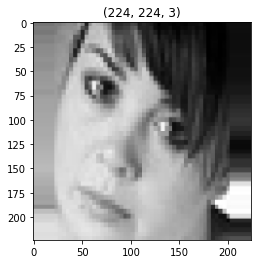

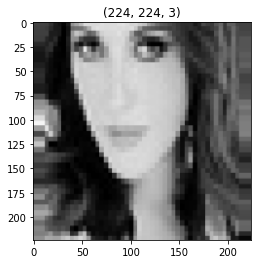

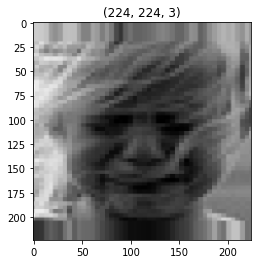

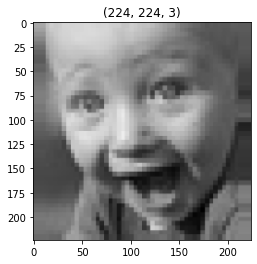

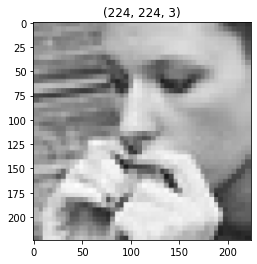

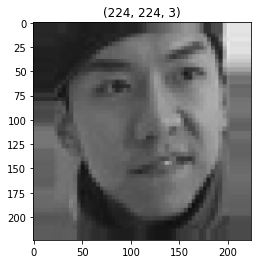

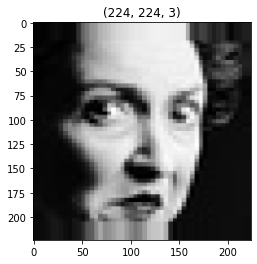

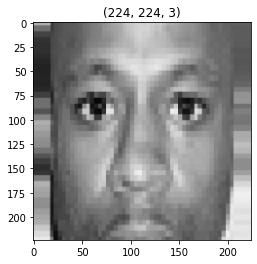

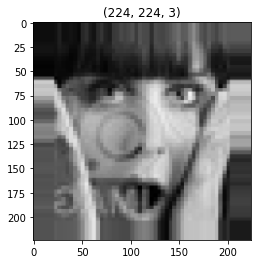

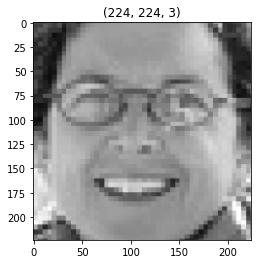

In [31]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [32]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [35]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data=val_data,
                           validation_steps = 8,
                           callbacks=[es,mc])

C:\Users\Dhan\AppData\Local\Temp/ipykernel_13220/4134021615.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 8.8177 - accuracy: 0.2781
Epoch 1: val_accuracy improved from -inf to 0.35156, saving model to best_model.h5
10/10 [==============================] - 19s 2s/step - loss: 8.8177 - accuracy: 0.2781 - val_loss: 8.3862 - val_accuracy: 0.3516
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 7.0364 - accuracy: 0.3875
Epoch 2: val_accuracy did not improve from 0.35156
10/10 [==============================] - 19s 2s/step - loss: 7.0364 - accuracy: 0.3875 - val_loss: 8.3833 - val_accuracy: 0.3281
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.3728 - accuracy: 0.3844
Epoch 3: val_accuracy improved from 0.35156 to 0.35938, saving model to best_model.h5
10/10 [==============================] - 17s 2s/step - loss: 6.3728 - accuracy: 0.3844 - val_loss: 6.5578 - val_accuracy: 0.3594
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 5.6217 - accuracy: 0.4094
Epoch 4: val_accu

In [36]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [37]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

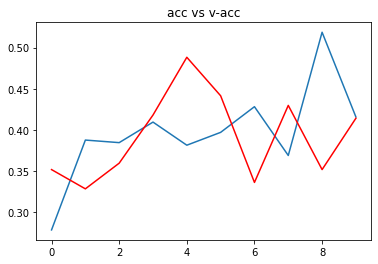

In [38]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

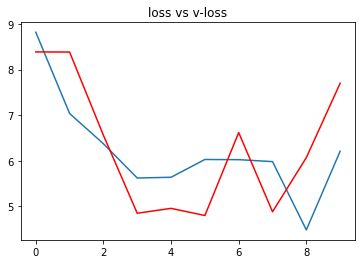

In [39]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [40]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [43]:
# path for the image to see if it predics correct class

path = "./test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

NameError: name 'load_img' is not defined